<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Dimensionality Reduction

---



## Curse of dimensionality

In machine learning problems there often involves tens of thousands of features for each training instance. This can be a problem as it makes our training extremely slow and prone to overfitting (refer to overfitting section). 

This problem is commonly referred to as the **curse of dimensionality**.



Because of the issues associated with the curse of dimensionality, it is necessary to reduce the number of features/dimensions considerably to help increase our model’s performance and enables us to arrive at an optimal solution for our machine learning model.

It turns out, when in high dimensional space, various phenomenae arise that do not occur in low-dimensional space.

<img src="assets/images/curse_dim1.png" style="width:60%" />

If you were to pick a random point in a unit space ( 1 x 1 square), it would only have about a 0.4% chance of being located less than 0.001 from the border (in other words, it is extremely unlikely that a random point will be ‘extreme along any dimensions’). 



But in a 10,000 dimensional unit hyper cube (a 1 x 1 x … x 1 cube, with ten thousand 1s), this probability is greater than 99.9999%.

High dimensional data sets are often at risk of being extremely sparse, making our model prone towards overfitting, and much less reliable than in lower dimensions - negatively impacting the performance of our machine learning model.

## Principal Component Analysis

PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, selecting new dimensions that preserve variance in the data as best it can.



The objective of PCA is simple, identify a hyperplane that lies closest to the data points, and project the data onto it.

<img src="assets/images/pca1.gif" style="width:80%" />

When mapping our original data set in a lower-dimensional hyperplane, we first must determine the right hyperplane. 

In PCA, the hyperplane, in most cases is determined by the axis through our data set, which preserves the maximum amount of variance.

<img src="assets/images/pca2.png" style="width:60%" />

We want to choose the axis that retains the maximum amount of variance in our data set, as it will most likely lose less information than if we were to consider other projections. 



<img src="assets/images/pca2.png" style="width:60%" />

In this case, the axis we choose is referred to as the first principal component, also known as PCA1 as it captures the maximum amount of variance within our data set, 

The second principal component, orthogonal to the first, as it accounts for the largest remaining variance in our dataset — denoted as PCA2.

It’s extremely simple to perform a PCA on our data set, using the function PCA from scikit-learn.

Let's try this with a simple example: our old friend, the Iris dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from itertools import cycle
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())

dataset = load_iris()



In [2]:
numSamples, numFeatures = dataset.data.shape
print(numSamples)
print(numFeatures)
print(list(dataset.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [3]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target

So, this tells us our data set has 150 samples (individual flowers) in it. It has 4 dimensions, and three distinct Iris species that each flower is classified into.



While we can visualize 2 or even 3 dimensions of data pretty easily, visualizing 4D data isn't something our brains can do. So let's distill this down to 2 dimensions, and see how well it works:

In [4]:
pca = PCA(n_components=2)
points = pca.fit_transform(iris[features])

What we have done is distill our 4D data set down to 2D, by projecting it down to two orthogonal 4D vectors that make up the basis of our new 2D projection. 

We can see what those 4D vectors are, although it's not something you can really wrap your head around:

In [5]:
print(pca.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


Let's see how much information we've managed to preserve:

In [6]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461621 0.05301557]
0.9776317750248033


Although we have thrown away two of our four dimensions, PCA has chosen the remaining two dimensions well enough that we've captured 92% of the variance in our data in a single dimension alone! 

The second dimension just gives us an additional 5%; altogether we've only really lost less than 3% of the variance in our data by projecting it down to two dimensions.



In [7]:
### Defining plotting functions

def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    
def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris['species'],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

Plotting the scatter plot of sepal length vs width, before PCA: 

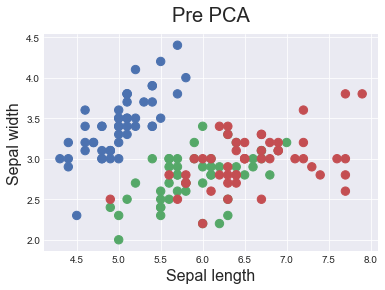

In [8]:
plot_iris_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = "Pre PCA",
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

**Replotting: 2D Plotting with PCA**

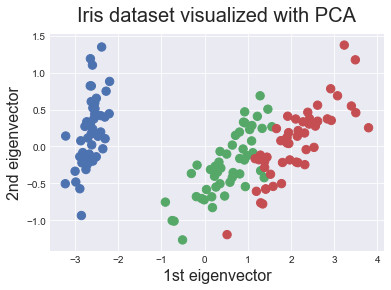

In [9]:
plot_iris_2d(
    x = points[:,0],
    y = points[:,1],
    title = 'Iris dataset visualized with PCA')

**3D plotting with PCA**

In [10]:
pca = PCA(n_components=3)
points = pca.fit_transform(iris[features])

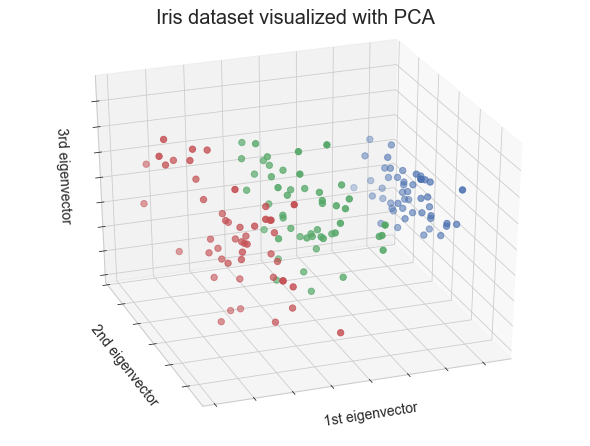

In [11]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with PCA")

You can see the three different types of Iris are still clustered pretty well. 

Although the actual numbers on this graph have no intuitive meaning, what we're probably seeing is measure of the ratio of width to height for petals and sepals - and PCA distilled our data down to that on its own.